## Import necessary tools

In [44]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

## Load Our Dataset

In [45]:
data = pd.read_csv('datasets/iris_dataset.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Plot the Data

For this exercise, try to cluster the iris flowers by the shape of their sepal

Use the 'sepal length' and 'sepal width' variables.

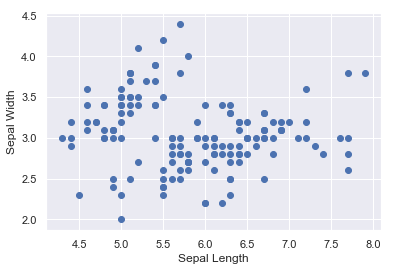

In [46]:
plt.scatter(data['sepal_length'], data['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

## Clustering (unscaled data)

In [47]:
x = data.copy()
#data.iloc[:,0:2]
#x

In [48]:
# create a k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [49]:
# create a copy of data, so we can see the clusters next to the original data
clusters = data.copy()
# predict the cluster for each observation
clusters['cluster_pred']=kmeans.fit_predict(x)

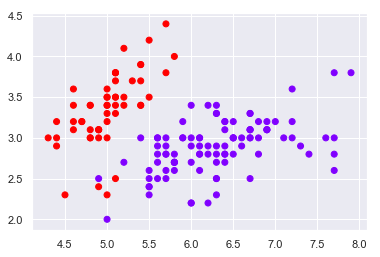

In [50]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters['sepal_length'], clusters['sepal_width'],c=clusters['cluster_pred'],cmap='rainbow')

## Standardize the Variables

- Import and use the method function from sklearn to standardize the data.

In [51]:
# Import a library where we can do that easily
from sklearn import preprocessing
# Scale the inputs 
# preprocessing.scale scales each variable (column in x) with respect to itself
# The new result is an array 
x_scaled = preprocessing.scale(x)
x_scaled

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

## Clustering (scaled data)

In [52]:
# Fiddle with k (the number of clusters) based on the elbow 
kmeans_new = KMeans(2)
# Fit the data
kmeans_new.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_new = x.copy()
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled)

Text(0, 0.5, 'Sepal Width')

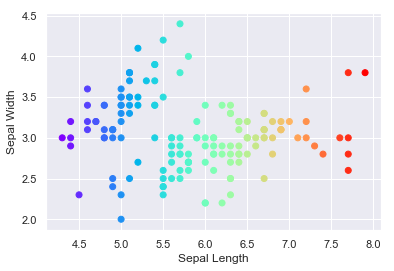

In [53]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_new['sepal_length'],clusters_new['sepal_width'],c=clusters_new['sepal_length'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

Looks like the two solutions are identical. That is because the original features have very similar scales to start with!

## Take Advantage of Elbow Method

### WCSS

In [54]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for.
# We have it set at 10 right now, but it is completely arbitrary.
cl_num = 10
for i in range(1,cl_num):
    
    kmeans = KMeans(i)
    
    kmeans.fit(x_scaled)
    
    wcss.append(kmeans.inertia_)
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.42714544645855,
 91.07563926881431,
 80.24972235577131,
 70.95875903826985,
 63.422029137831245,
 54.34294607489977]

### The Elbow Method

Text(0, 0.5, 'WCSS: Within-cluster Sum of Squares')

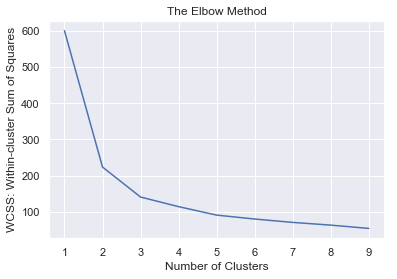

In [56]:
# Plot the number of clusters vs WCSS
number_clusters = range(1,cl_num)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS: Within-cluster Sum of Squares')

How many clusters there are best?

Answer: It looks like 2 or 3 clusters are solutions and work best.

## Understanding the Elbow Curve 

Construct and compare the scatter plots to determine which number of clusters is appropriate for further use in our analysis. Based on the Elbow Curve, 2,3 or 5 seem the most likely.

### 2 Clusters 

Start by separating the standardized data into 2 clusters(you've already done that!)

Construct a scatter plot of the original data using the standardized clusters

### 3 Clusters 

Redo the same for 3 and 5 cluster

In [82]:
# Fiddle with k (the number of clusters) based on the elbow 
kmeans_3 = KMeans(3)
# Fit the data
kmeans_3.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_3 = x.copy()
clusters_3['cluster_pred'] = kmeans_3.fit_predict(x_scaled)

Text(0, 0.5, 'Sepal Width')

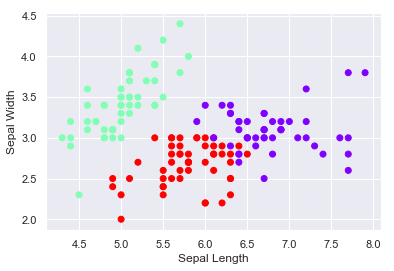

In [83]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_new['sepal_length'],clusters_3['sepal_width'],c=clusters_3['cluster_pred'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

### 5 Clusters

In [84]:
# Fiddle with k (the number of clusters) based on the elbow 
kmeans_5 = KMeans(5)
# Fit the data
kmeans_5.fit(x_scaled)
# Create a new data frame with the predicted clusters
clusters_5 = x.copy()
clusters_5['cluster_pred'] = kmeans_5.fit_predict(x_scaled)

Text(0, 0.5, 'Sepal Width')

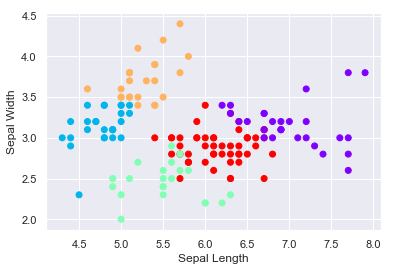

In [85]:
# create a scatter plot based on two corresponding features (sepal_length and sepal_width; OR petal_length and petal_width)
plt.scatter(clusters_5['sepal_length'],clusters_5['sepal_width'],c=clusters_5['cluster_pred'],cmap='rainbow')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

### Compare your solutions to the original iris dataset

In [86]:
real_data = pd.read_csv('datasets/iris_with_answers.csv')

In [87]:
real_data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [88]:
real_data['species'] = real_data['species'].map({'setosa':0,'versicolor':1,'virginica':2})

In [89]:
real_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Scatter Plots (which we will use for comparison)

Looking at the first graph it seems like the clustering solution is much more intertwined than what we imagined (and what we found before)

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


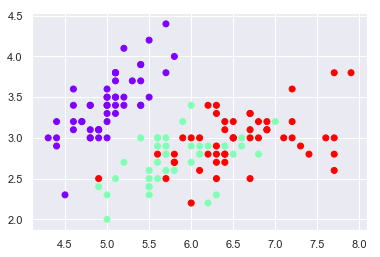

In [79]:
plt.scatter(real_data['sepal_length'],real_data['sepal_width'],c=real_data['species'],cmap='rainbow')

Examining the other scatter plot (petal length vs petal width), we see that in fact the features which actually make the species different are perals and NOT sepals! 

Note that 'real data' is the data observed in the real world (biological data)

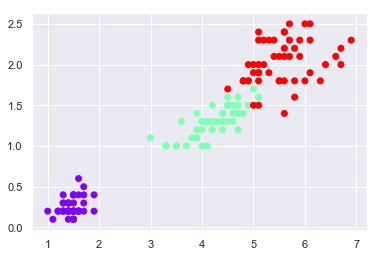

In [80]:
plt.scatter(real_data['petal_length'],real_data['petal_width'],c=real_data['species'],cmap='rainbow')

### Our clustering solution data

It seems that our solution takes into account mainly the sepal features

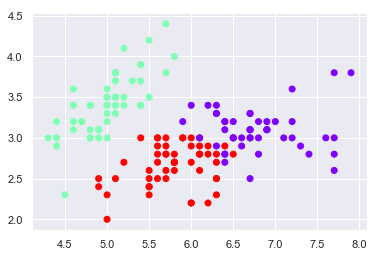

In [90]:
plt.scatter(clusters_3['sepal_length'],clusters_3['sepal_width'],c=clusters_3['cluster_pred'],cmap='rainbow')

Instead of the petals...

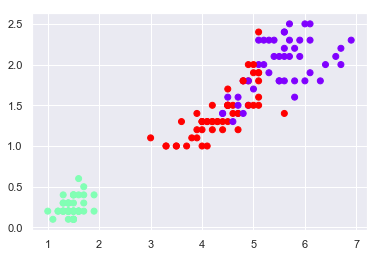

In [91]:
plt.scatter(clusters_3['petal_length'],clusters_3['petal_width'],c=clusters_3['cluster_pred'],cmap='rainbow')

## Further Clarifications

In fact, if you read about it, the original dataset has 3 sub-species of the Iris flower. Therefore, the number of clusters is 3. 

This shows us that:
- the Elbow method is imperfect (we might have opted for 2 or even 4)
- k-means is very useful in moments where we already 
- biology cannot be always quantified (or better)..quantified with k-means! Other methods are much better at that

Finally, you can try to classify them (instead of clustering them, now that you have all the data)!